In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

## Data collection: GALAH DR4 x Globular Cluster List

In [3]:
# First read in the unvalidated GALAH DR4 file
galah_dr4_raw = Table.read('../spectrum_post_processing/galah_dr4_allspec_not_validated.fits')
galah_dr4_raw['source_id'] = galah_dr4_raw['gaiadr3_source_id']
# Read in your favourite Globular Cluster list. Keep in mind that we need tmass_id or gaia source_id as identifier
cluster_list = Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_8GCs_70percent.fits')
# Join them with the keyword
data = join(galah_dr4_raw, cluster_list, keys='source_id')

In [17]:
cluster_names = np.unique(data['cluster'])

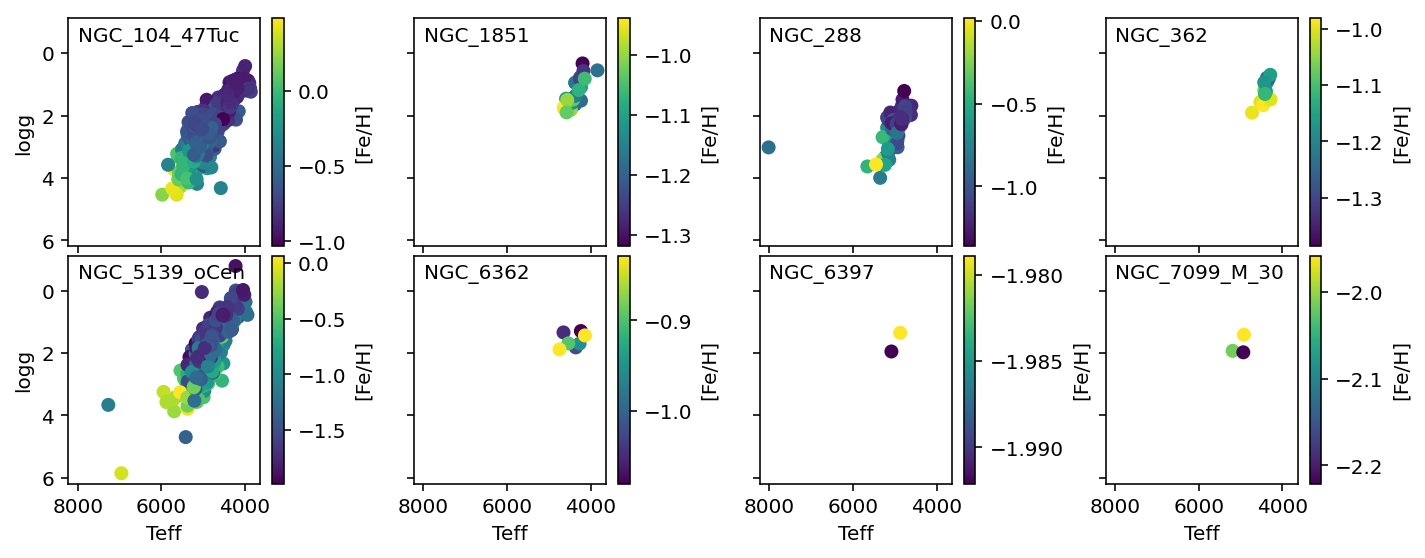

In [38]:
def plot_hrd_all_cluster(data, cluster_names):

    f, gs = plt.subplots(2,4,figsize=(10,4),sharex=True,sharey=True)
    
    for cluster_index in range(len(cluster_names)):
        
        # Preparation of the individual panels
        if cluster_index < int(len(cluster_names) / 2):
            ax = gs[0,cluster_index]
            if cluster_index == 0:
                ax.set_ylabel('logg')
        else:
            ax = gs[1,cluster_index - int(len(cluster_names) / 2)]
            if cluster_index == int(len(cluster_names) / 2):
                ax.set_ylabel('logg')
            ax.set_xlabel('Teff')
            
        ax.text(0.05,0.9,cluster_names[cluster_index],transform=ax.transAxes)
    
        select_unflagged_stars_in_cluster = (
            (data['cluster'] == cluster_names[cluster_index]) & 
            (data['flag_sp'] == 0)
        )
        
        # Plot a teff-logg diagram color-coded by [Fe/H]
        s = ax.scatter(
            data['teff'][select_unflagged_stars_in_cluster],
            data['logg'][select_unflagged_stars_in_cluster],
            c = data['fe_h'][select_unflagged_stars_in_cluster]
        )
        # Add the colorbar for [Fe/H]
        cbar = plt.colorbar(s, ax=ax)
        cbar.set_label('[Fe/H]')

    # Invert x- and y-axis
    ax.set_xlim(ax.get_xlim()[::-1])
    ax.set_ylim(ax.get_ylim()[::-1])

    plt.tight_layout(w_pad=0,h_pad=0)
    
plot_hrd_all_cluster(data,cluster_names)

## Data collection: GALAH DR4 x OmegaCen by Johnson & Pilachowski (2010)

In [4]:
jp10 = Table.read('literature_data/JohnsonPilachowski2010_ApJ_722_1373_OmegaCen_xmatch.fits')
galah_jp10 = join(galah_dr4_raw,jp10,keys='sobject_id')

(2.7168271780014037, -0.30258300304412844)

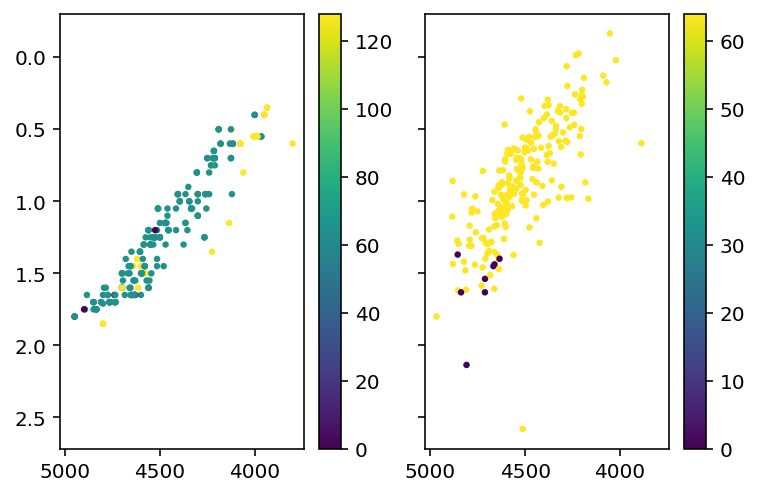

In [11]:
f, gs = plt.subplots(1,2,sharex=True,sharey=True)
ax = gs[0]
s = ax.scatter(
    galah_jp10['Teff'], galah_jp10['log_g_'],
    c = galah_jp10['flag_sp'],
    s = 5
)
plt.colorbar(s,ax=ax)

ax = gs[1]
s = ax.scatter(
    galah_jp10['teff'], galah_jp10['logg'],
    c = galah_jp10['flag_sp'],
    s = 5
)
plt.colorbar(s,ax=ax)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])

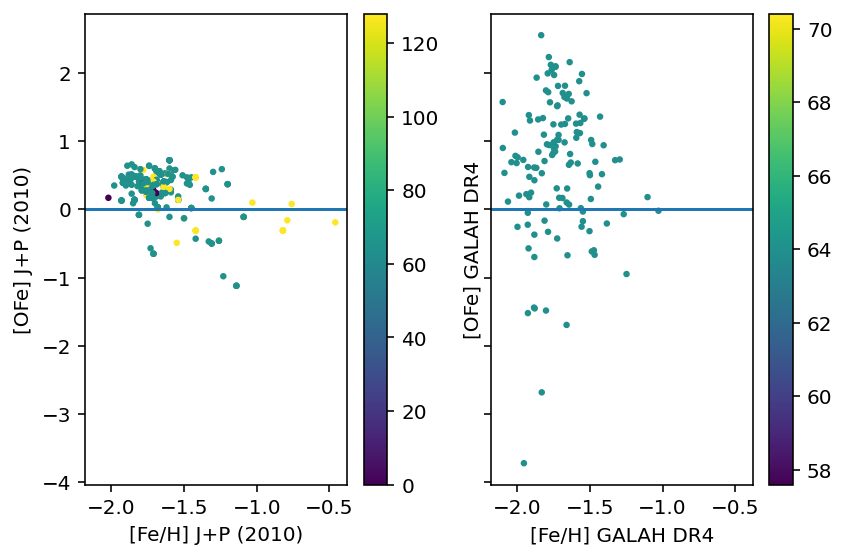

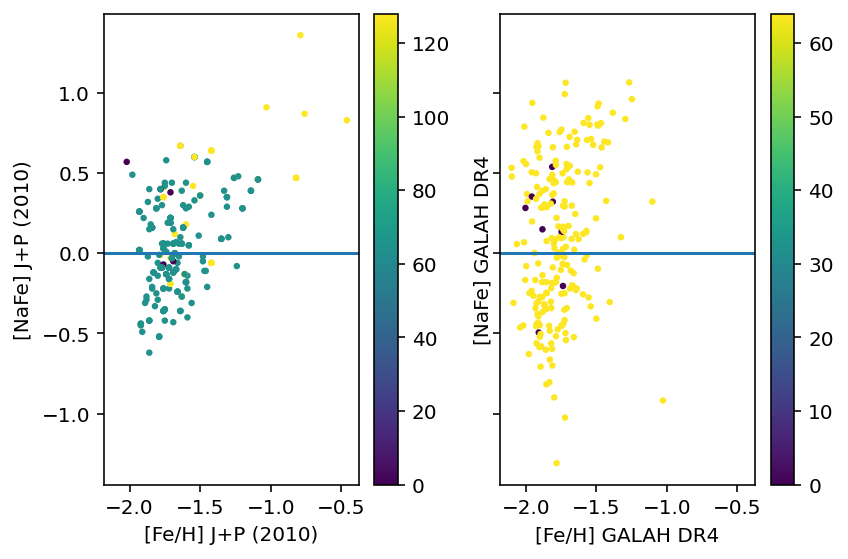

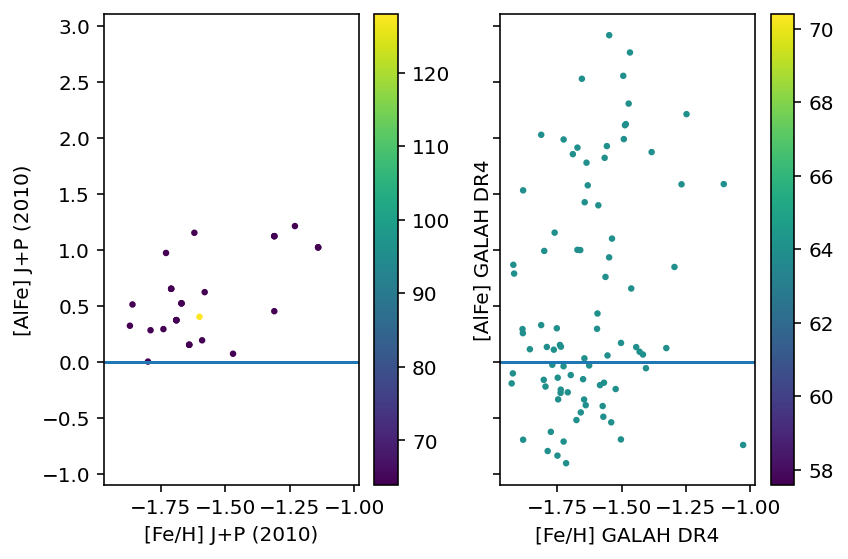

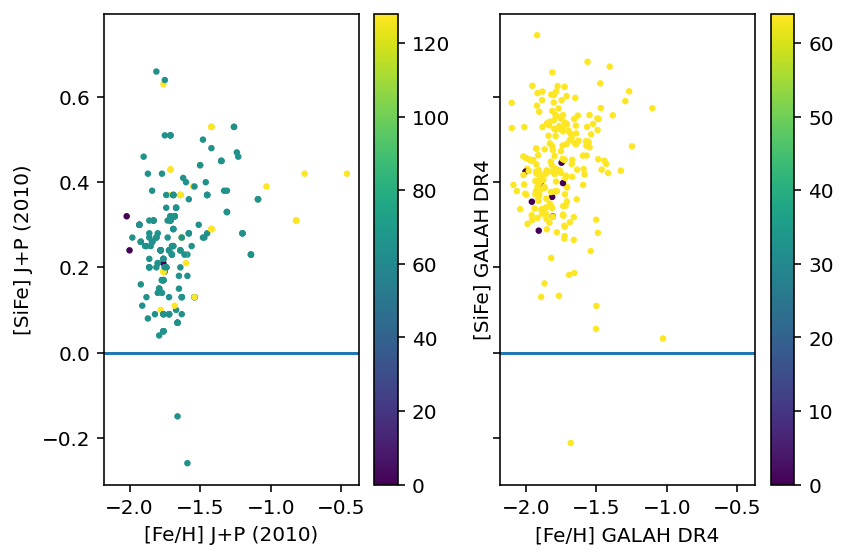

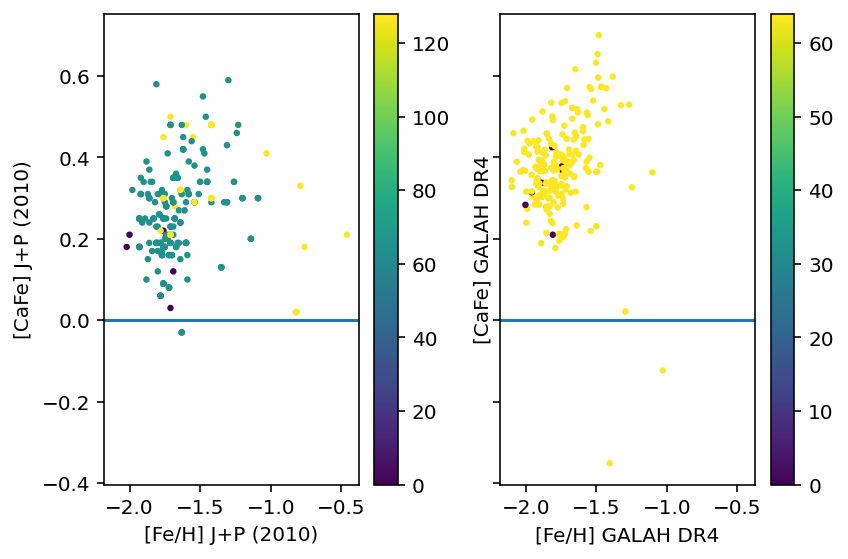

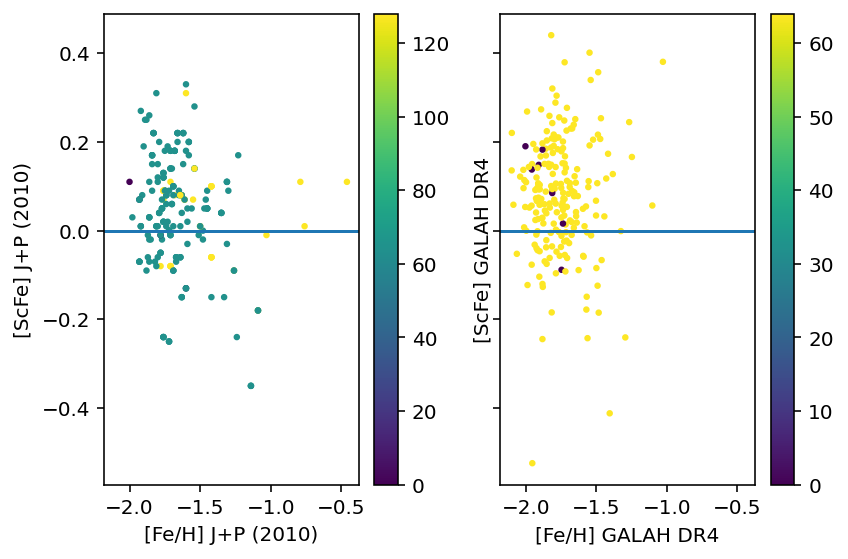

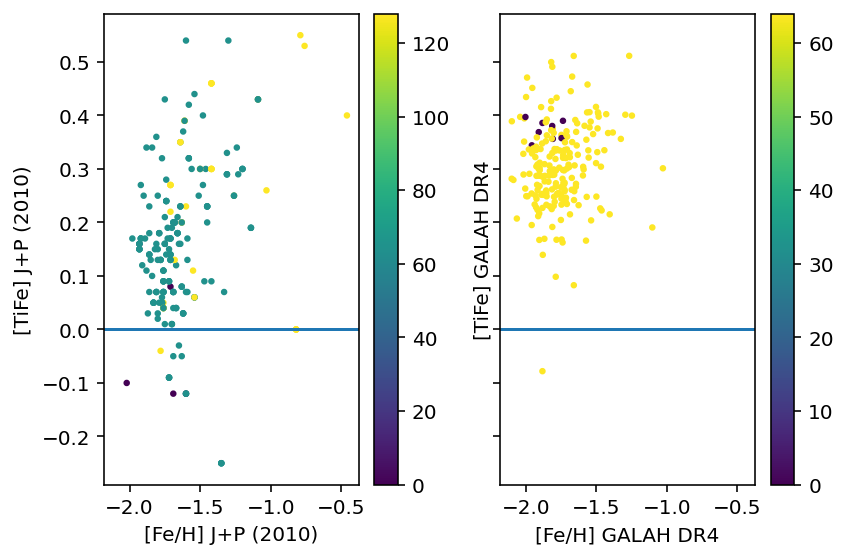

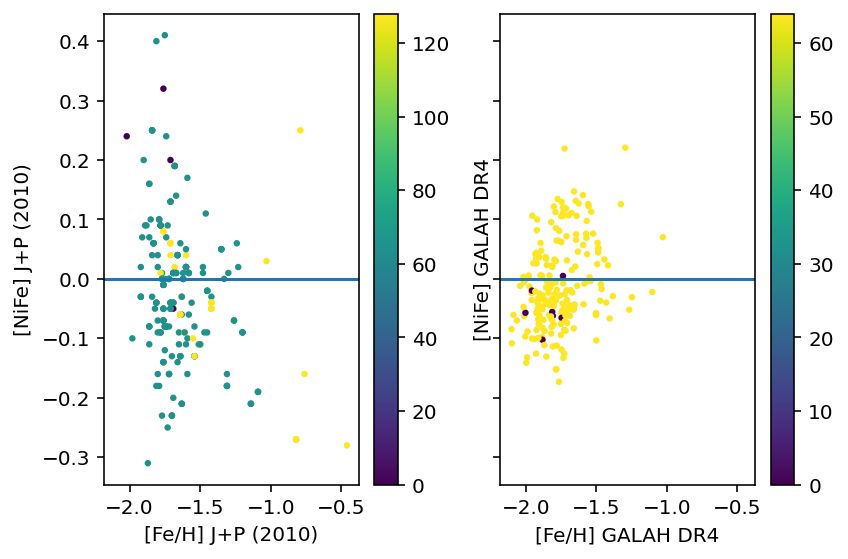

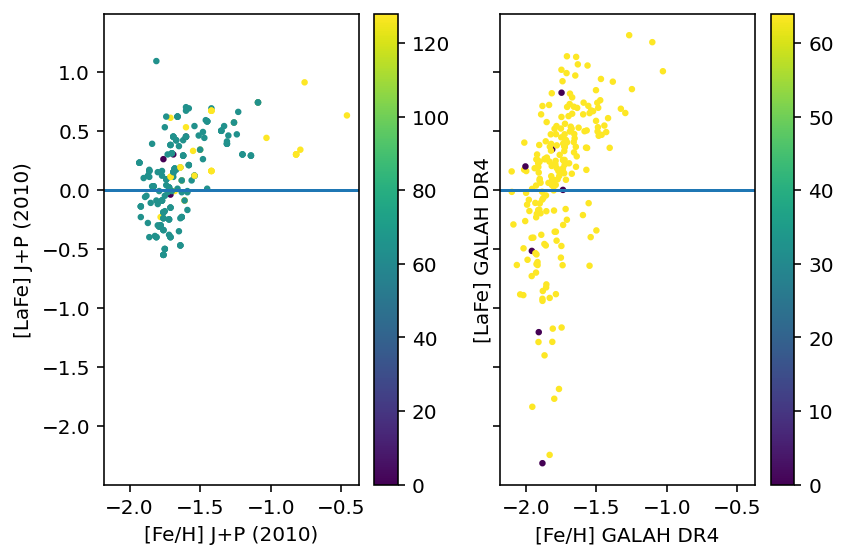

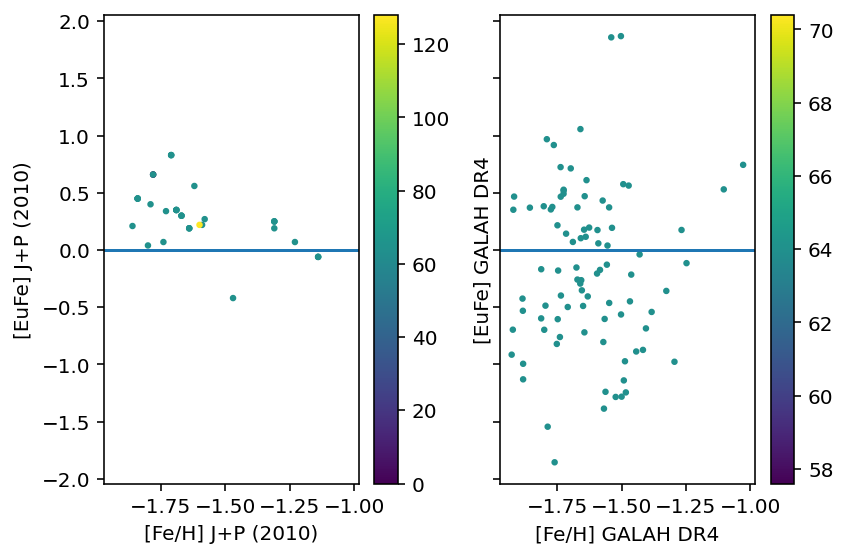

In [20]:
for elem in ['O','Na','Al','Si','Ca','Sc','Ti','Ni','La','Eu']:
    
    if elem in ['La','Eu']:
        name = elem+'II'
    else:        
        name = elem

    f, gs = plt.subplots(1,2,sharex=True,sharey=True)
    ax = gs[0]
    s = ax.scatter(
        galah_jp10['__Fe_H_'], galah_jp10['__'+name+'_Fe_'],
        c = galah_jp10['flag_sp'],
        s = 5
    )
    plt.colorbar(s,ax=ax)
    ax.set_xlabel('[Fe/H] J+P (2010)')
    ax.set_ylabel('['+elem+'Fe] J+P (2010)')
    ax.axhline(0)
    
    ax = gs[1]
    s = ax.scatter(
        galah_jp10['fe_h'], galah_jp10[elem.lower()+'_fe'],
        c = galah_jp10['flag_sp'],
        s = 5
    )
    plt.colorbar(s,ax=ax)
    ax.set_xlabel('[Fe/H] GALAH DR4')
    ax.set_ylabel('['+elem+'Fe] GALAH DR4')
    ax.axhline(0)
    plt.tight_layout()
    plt.show()
    plt.close()